<a href="https://colab.research.google.com/github/hadibudhy/fellowhip/blob/main/Nur_Hadi_Budhy_Practical_Case_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# English Premier League 2018-2019

**Scenarios**

Looking back at the season that was 2018-2019 and looking to delve into sight deeper insights. Using the data to see how clubs are similar stylistically, in the way they pass, attack and score goals.

This dataset is wide ranging in the sense it encompass stats seen on a regular league table but goes beyond looking at how teams pass and keep possession, how they defend, tackle as well as looking at market values of a team and how much money each teamwas allotted from the TV rights deal. This data was gathered from 

*   BBC Sports Football
*   Premierleague.com
*   Transfermarkt.co.uk

Some goals of this project:
1.   Whether this data is clean?
2.   How is the point distribution of the epl team? and which team is an anomaly?
3.   Which team has the best attack?
4.   Which team has the best defence?
5.   Which team is good in financial aspect?

Explore your creativity!

## Preprocessing

In [1]:
# Import library
import pandas as pd
import numpy as np
import klib
import plotly.express as px
import plotly.figure_factory as ff
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the dataset
df_raw = pd.read_csv('epl_1819.csv')
df_raw.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


In [3]:
# Check missing data and data type
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

In [4]:
# Create new dataframe
df_raw2 = df_raw.copy()

# Assign the correct data type
df_raw2['attack_passes'] = df_raw2['attack_passes'].str.replace(r'\D', '').astype(int)
df_raw2['attack_passes_long'] = df_raw2['attack_passes_long'].str.replace(r'\D', '').astype(int)
df_raw2['attack_passes_back'] = df_raw2['attack_passes_back'].str.replace(r'\D', '').astype(int)
df_raw2['defence_clearances'] = df_raw2['defence_clearances'].str.replace(r'\D', '').astype(int)

# Make columns name homogen
df_raw2.columns = df_raw2.columns.str.replace(' ', '') 

# Check the data
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Team                          20 non-null     object 
 1   category                      20 non-null     object 
 2   general_league_position       20 non-null     int64  
 3   finance_live_games_televised  20 non-null     int64  
 4   finance_tv_revenue            20 non-null     int64  
 5   general_matches_played        20 non-null     int64  
 6   general_won                   20 non-null     int64  
 7   general_draw                  20 non-null     int64  
 8   general_lost                  20 non-null     int64  
 9   attack_scored                 20 non-null     int64  
 10  defence_goals_conceeded       20 non-null     int64  
 11  general_goal_difference       20 non-null     int64  
 12  general_points                20 non-null     int64  
 13  general

In [5]:
# Create new dataframe
df = df_raw2.copy()

# Check data
df.describe()

,general_league_position,finance_live_games_televised,finance_tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance_team_market,finance_market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
count,20.00000,20.000000,2.000000e+01,20.0,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,17.100000,1.228004e+08,38.0,15.450000,7.10000,15.450000,53.600000,53.600000,0.000000,53.450000,25.250000,27.490000,17.450000,3.750362e+08,1.498508e+07,17433.100000,58.700000,2333.850000,2590.650000,666.650000,195.350000,481.650000,165.550000,9.300000,4.200000,46.400000,7.250000,61.100000,2.350000,3.350000,1.150000,111.950000,127.750000,429.300000,646.250000,3.200000,862.600000,429.400000,5.350000,49.995000,78.310000
std,5.91608,6.734827,1.821686e+07,0.0,7.250953,2.44734,6.778255,18.071204,15.752694,32.371202,21.007455,1.802776,0.938588,4.071402,2.821444e+08,1.127381e+07,4192.193659,33.625022,284.745182,679.843115,75.524325,34.776391,78.333481,39.323858,3.934998,2.546411,16.044018,4.165965,10.557611,1.424411,2.433862,1.136708,24.267099,37.160923,71.058982,65.310493,1.880649,166.150661,84.536756,2.109502,6.387692,5.866129
min,1.00000,10.000000,9.662886e+07,38.0,3.000000,2.00000,1.000000,22.000000,22.000000,-54.000000,16.000000,20.000000,26.100000,10.000000,8.549200e+07,3.053600e+06,10226.000000,15.000000,1774.000000,1418.000000,562.000000,140.000000,360.000000,108.000000,4.000000,1.000000,17.000000,1.000000,38.000000,0.000000,0.000000,0.000000,58.000000,63.000000,314.000000,518.000000,0.000000,543.000000,246.000000,1.000000,39.100000,63.900000
25%,5.75000,11.750000,1.069409e+08,38.0,10.750000,6.75000,12.250000,44.250000,46.000000,-20.750000,39.750000,25.000000,26.800000,15.500000,1.723480e+08,6.747400e+06,15006.500000,34.500000,2248.000000,2192.750000,612.500000,174.750000,440.000000,145.000000,6.500000,2.000000,38.500000,4.750000,55.750000,1.000000,1.000000,0.000000,94.750000,108.000000,364.250000,604.500000,2.000000,768.000000,390.250000,4.750000,46.300000,75.550000
50%,10.50000,15.000000,1.213295e+08,38.0,14.500000,7.00000,16.000000,51.500000,53.500000,-2.500000,51.000000,25.500000,27.250000,18.000000,2.317260e+08,9.935200e+06,16426.000000,50.500000,2325.000000,2427.000000,640.500000,193.500000,472.000000,159.500000,9.500000,4.000000,44.000000,7.000000,59.500000,2.000000,3.000000,1.000000,113.500000,132.000000,434.500000,655.000000,3.500000,888.000000,445.000000,5.000000,48.350000,78.150000
75%,15.25000,25.000000,1.422731e+08,38.0,19.500000,9.00000,19.250000,63.500000,65.750000,13.750000,67.000000,26.000000,28.150000,20.000000,5.882800e+08,2.326060e+07,19602.750000,78.000000,2522.750000,2838.000000,713.500000,209.250000,517.750000,185.250000,12.000000,5.000000,53.250000,10.000000,71.250000,4.000000,5.000000,2.000000,128.500000,147.250000,472.500000,702.500000,4.000000,972.750000,499.250000,7.000000,54.000000,82.525000
max,20.00000,29.000000,1.524251e+08,38.0,32.000000,12.00000,28.000000,95.000000,81.000000,72.000000,98.000000,28.000000,29.700000,27.000000,1.003200e+09,3.99872

Note: The number of non binary numerical features is very large (41), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


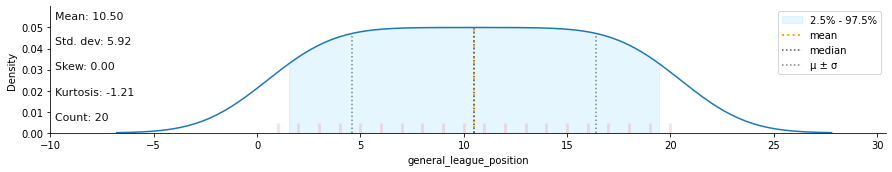

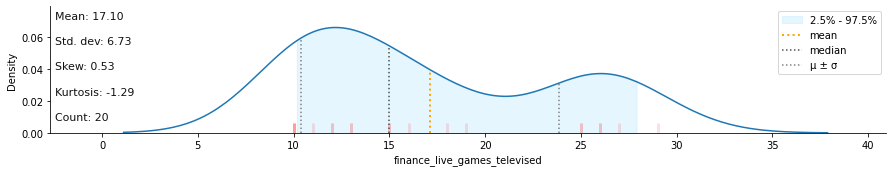

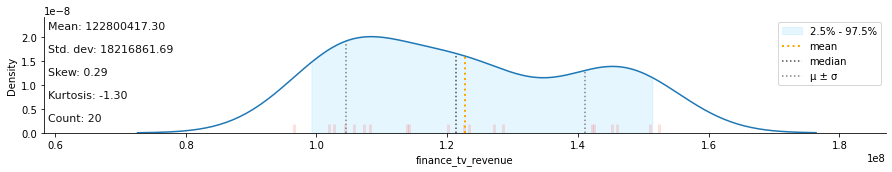

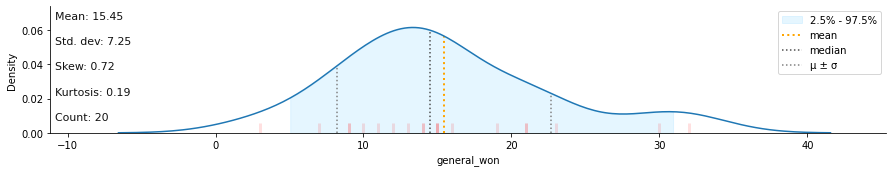

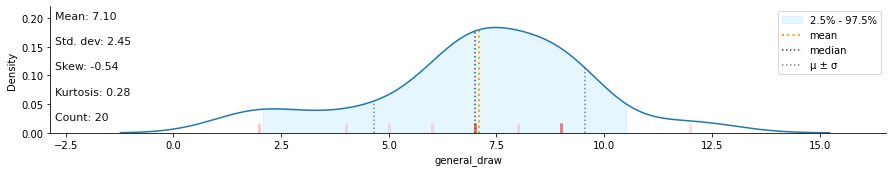

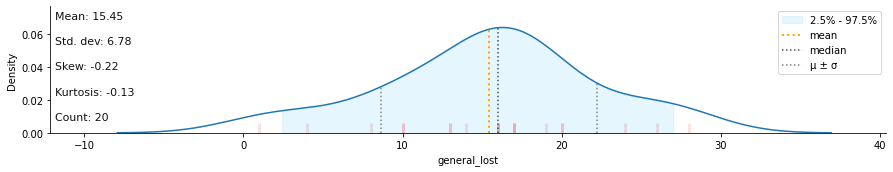

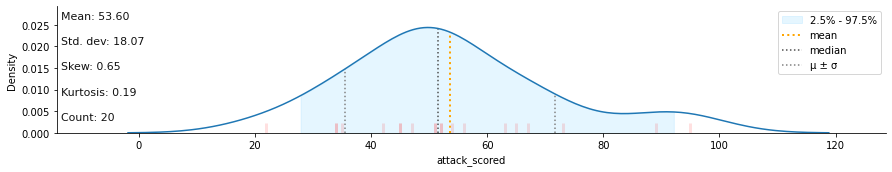

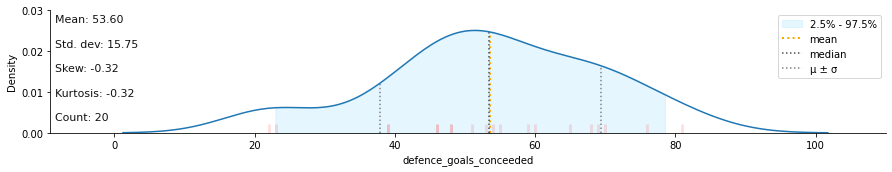

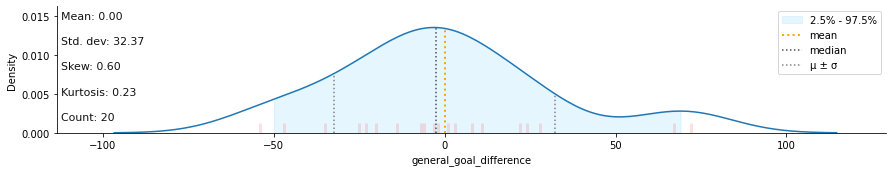

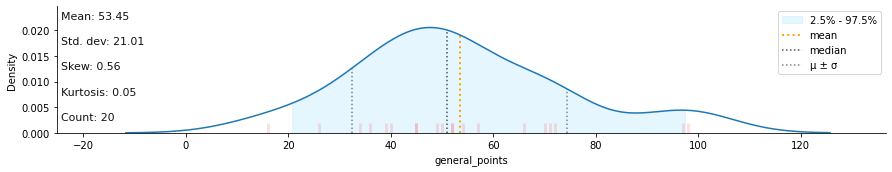

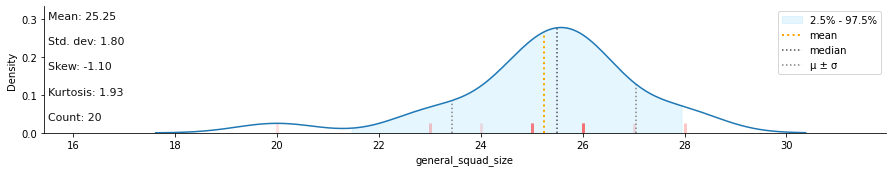

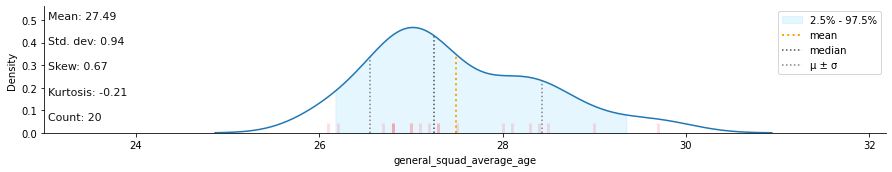

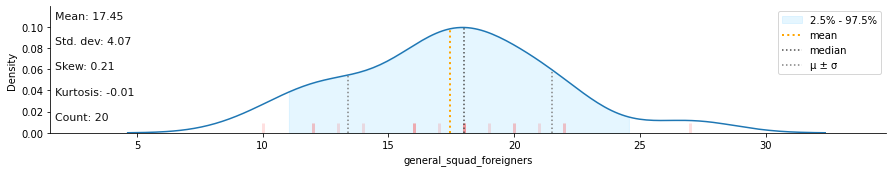

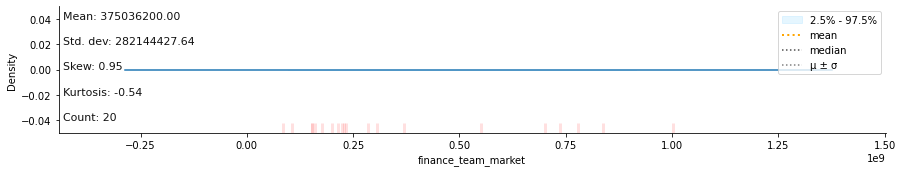

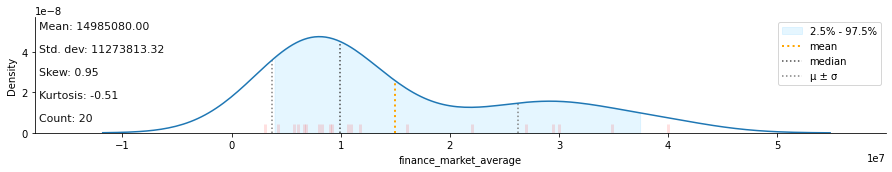

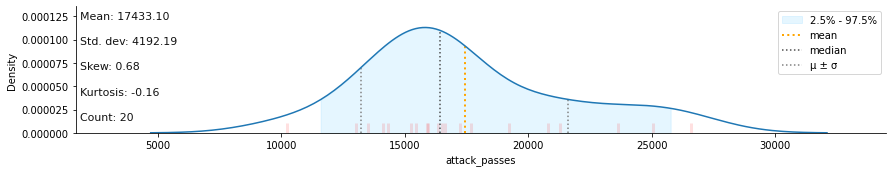

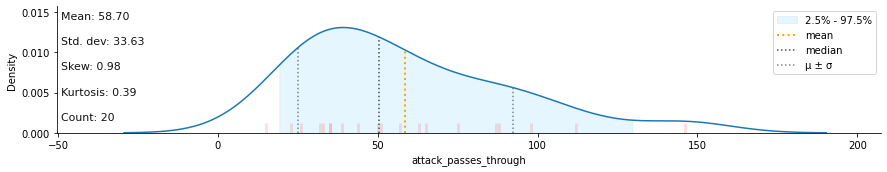

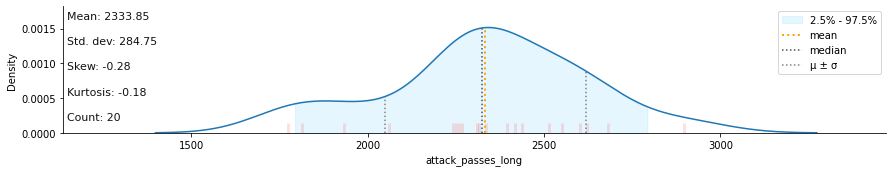

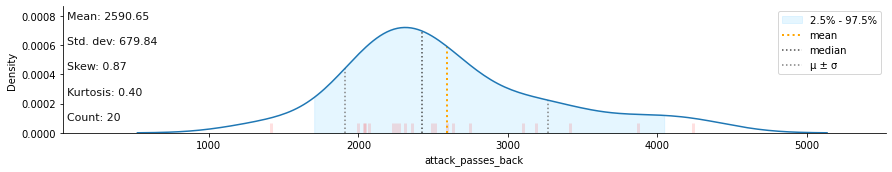

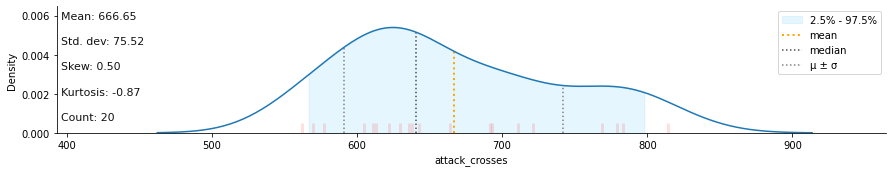

In [6]:
# Check numerical data distribution
klib.dist_plot(df)

GridSpec(6, 2)

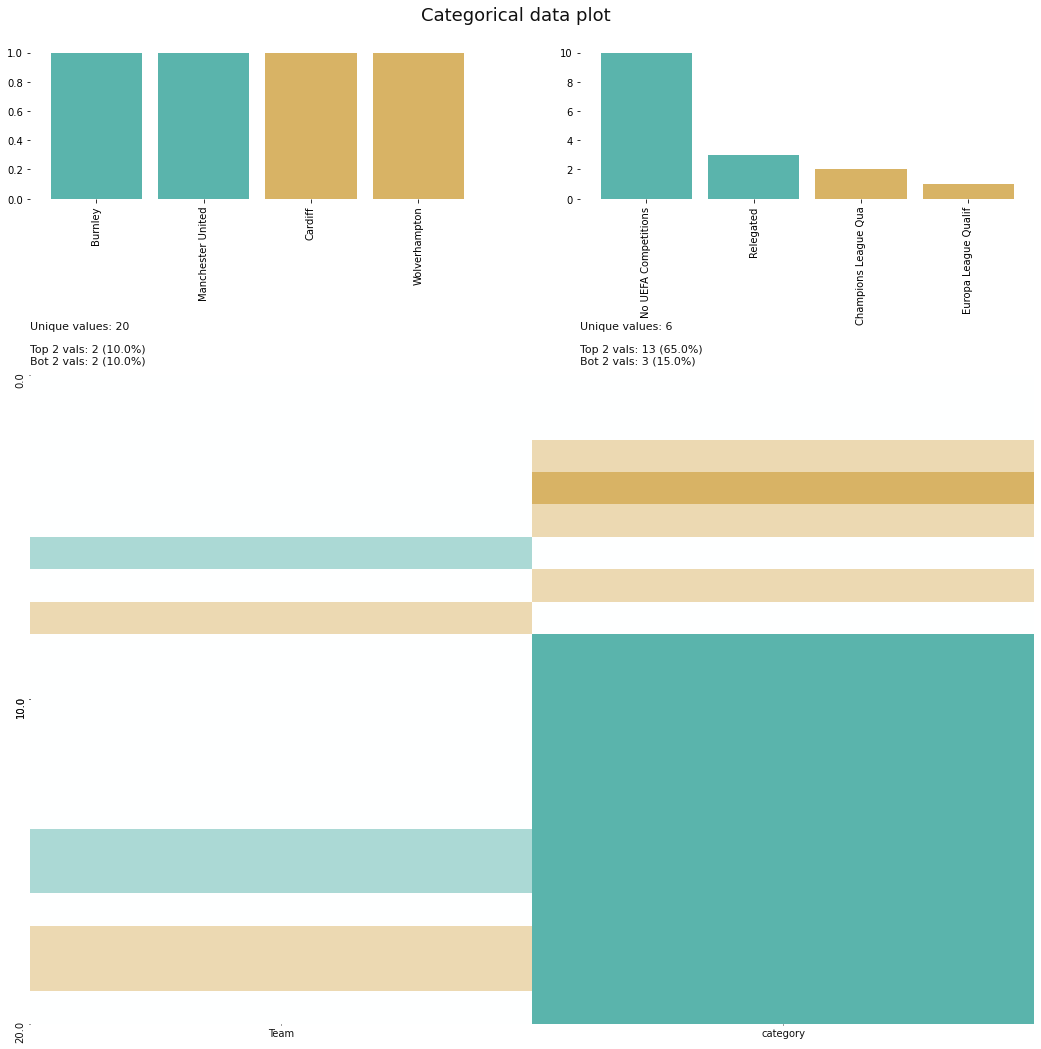

In [7]:
# Check categorical data distribution
klib.cat_plot(df, top=2, bottom=2)

## 1. Is This Data clean?

The data is not clean because there are 4 columns that have false data type. The columns are:

1. attack_passes
2. attack_passes_long
3. attack_passes_back
4. defence_clearances

Those data are assign as object and not a numerical type because they have comma in their values. To solve this problem we need to drop the comma and change their type to integer.

Also there are several column names that have space and not homogen to the rest column names.  To solve this problem we need to drop the space from the column name.



## 2. How is the point distribution of the epl team? and which team is an anomaly?

In [8]:
# Check point descriptive statistics
df.general_points.describe()

count    20.000000
mean     53.450000
std      21.007455
min      16.000000
25%      39.750000
50%      51.000000
75%      67.000000
max      98.000000
Name: general_points, dtype: float64

In [9]:
# Check points distribution using boxplot
fig = px.box(df.general_points, y="general_points")
fig.show()

In [10]:
# Check points distribution using distribution plot
fig = ff.create_distplot([df.general_points],['general_points'],bin_size=30)
fig.show()

In [11]:
# Check points distribution using bar chart
fig = px.bar(x=df.Team, y=df.general_points, labels={'x':'Team', 'y':'Points'})
fig.show()

**Check point distribution with normality test**

In [12]:
# Shapiro normality test
stat, p = shapiro(df.general_points)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.953, p=0.411
Sample looks Gaussian (fail to reject H0)


In [13]:
# D'Agostino and Pearson's normality test
stat, p = normaltest(df.general_points)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.947, p=0.378
Sample looks Gaussian (fail to reject H0)


In [14]:
# Anderson normality test
result = anderson(df.general_points)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.385
15.000: 0.506, data looks normal (fail to reject H0)
10.000: 0.577, data looks normal (fail to reject H0)
5.000: 0.692, data looks normal (fail to reject H0)
2.500: 0.807, data looks normal (fail to reject H0)
1.000: 0.960, data looks normal (fail to reject H0)


Based on descriptive statistics, boxplot, distribution plot, barchart, and several normality tests, we can conclude that the point distribution of the EPL team is follow normal distribution and no team has an anomaly.

## 3. Which team has the best attack?

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


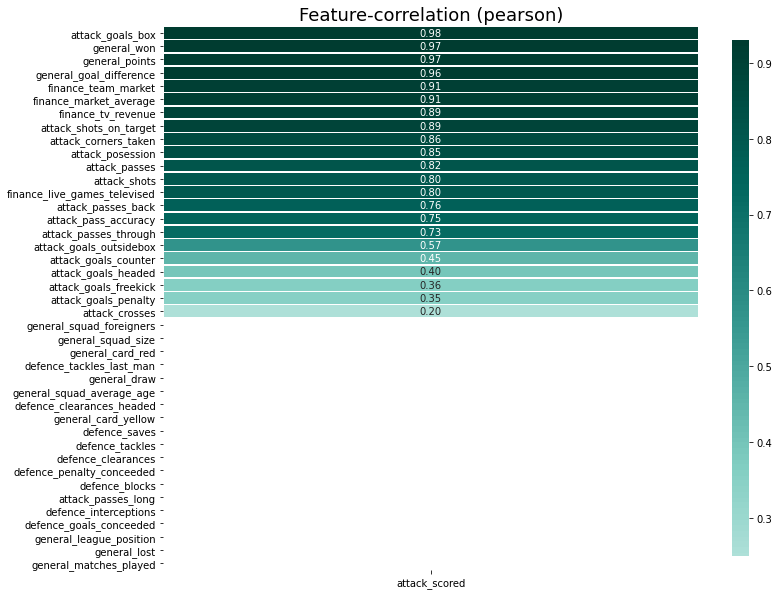

In [15]:
# Check correlation of attack_scored
klib.corr_plot(df, target='attack_scored', split='pos')

In [16]:
# Create team dataframe
team_pos = df[['Team', 'general_league_position']]
team_pos.head(2)

,Team,general_league_position
0,Manchester City,1
1,Liverpool,2


In [17]:
# Create team attack scoring dataframe
df_att = df[['general_league_position', 'general_points', 'attack_scored', 'attack_passes', 'attack_passes_through', 'attack_passes_long', 'attack_passes_back', 'attack_crosses', 'attack_corners_taken', 'attack_shots', 'attack_shots_on_target', 'attack_goals_headed', 'attack_goals_penalty', 'attack_goals_box', 'attack_goals_outsidebox', 'attack_goals_counter', 'attack_goals_freekick', 'attack_posession', 'attack_pass_accuracy']].set_index('general_league_position')
df_att.head(2)

,general_points,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
general_league_position,,,,,,,,,,,,,,,,,,
1,98,95,26581,112,1814,4240,783,298,683,260,12,3,80,15,5,2,64.0,89.0
2,97,89,23638,98,2250,3416,721,249,575,226,19,7,84,5,6,1,58.8,84.4


In [18]:
# Declare standardization method
scaler = MinMaxScaler()

# Transform the data
scaler.fit(df_att)
score_att = pd.DataFrame(np.sum((scaler.transform(df_att)), axis=1), columns=['score_att'])

#Finalize and check the data
df_best_att = pd.merge(team_pos, score_att, left_index=True, right_index=True)
df_best_att.sort_values(by=['score_att'], ascending=False).head()

,Team,general_league_position,score_att
0,Manchester City,1,14.571106
1,Liverpool,2,12.813807
3,Tottenham,4,10.488416
2,Chelsea,3,10.428643
8,Leicester,9,9.654787


In [19]:
# Visualize Best Attacking Team
fig = px.bar(x=df_best_att.Team, y=df_best_att.score_att, labels={'x':'Team', 'y':'Score'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [20]:
# Print Best Attacking Team
print('Best team with the best attack is: ', '\n', df_best_att.sort_values(by='score_att',ascending=False).iloc[0])

Best team with the best attack is:  
 Team                       Manchester City
general_league_position                  1
score_att                          14.5711
Name: 0, dtype: object


## 4. Which team has the best defence?

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


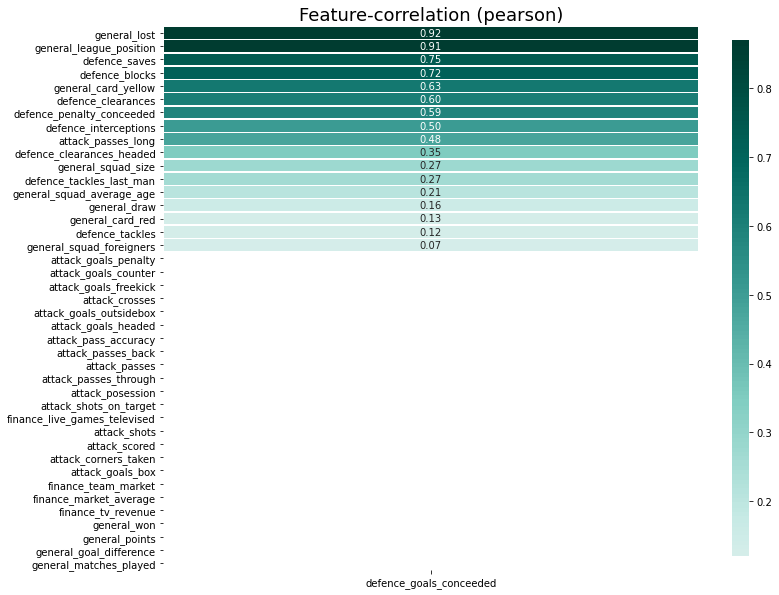

In [21]:
# Check correlation of defence_goals_conceded
klib.corr_plot(df, target='defence_goals_conceeded', split='pos')

In [22]:
# Create team defence scoring dataframe
df_def1 = df[['general_league_position', 'general_points', 'general_goal_difference', 'defence_saves', 'defence_blocks', 'defence_interceptions', 'defence_tackles', 'defence_clearances']].set_index('general_league_position')
df_def2 = df[['general_league_position', 'general_lost', 'defence_goals_conceeded', 'general_card_yellow', 'general_card_red', 'defence_penalty_conceeded']].set_index('general_league_position')

# Check dataframe
df_def1.head(2)

,general_points,general_goal_difference,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_clearances
general_league_position,,,,,,,
1,98,72,58,63,362,518,543
2,97,67,76,78,314,610,639


In [23]:
#Check dataframe
df_def2.head(2)

,general_lost,defence_goals_conceeded,general_card_yellow,general_card_red,defence_penalty_conceeded
general_league_position,,,,,
1,4,23,44,1,4
2,1,22,38,2,1


In [24]:
# Transform the data
scaler.fit(df_def1)
score_def1 = pd.DataFrame(np.sum((scaler.transform(df_def1)), axis=1), columns=['score_def1'])

# Transform the data with descending scoring
scaler2 = MinMaxScaler(feature_range= (-1, 0))
scaler2.fit(df_def2)
score_def2 = pd.DataFrame(np.sum((scaler2.transform(df_def2)), axis=1), columns=['score_def2'])

#Finalize and check the data
score_def = pd.DataFrame(np.subtract(score_def1.to_numpy(), score_def2.to_numpy()), columns=['score_def'])
df_best_def = pd.merge(team_pos, score_def, left_index=True, right_index=True)
df_best_def.sort_values(by=['score_def'], ascending=False).head()

,Team,general_league_position,score_def
1,Liverpool,2,7.442802
9,West Ham,10,7.155389
6,Wolverhampton,7,6.920391
12,Newcastle,13,6.750187
11,Crystal Palace,12,6.693677


In [25]:
# Visualize Best Defending Team
fig = px.bar(x=df_best_def.Team, y=df_best_def.score_def, labels={'x':'Team', 'y':'Score'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [26]:
# Print Best Defending Team
print('Best team with the best defend is: ', '\n', df_best_def.sort_values(by='score_def',ascending=False).iloc[0])

Best team with the best defend is:  
 Team                       Liverpool
general_league_position            2
score_def                     7.4428
Name: 1, dtype: object


## 5. Which team is good in financial aspect?

In [27]:
# Create team finance scoring dataframe
df_fin = df[['general_league_position', 'finance_tv_revenue', 'finance_team_market', 'finance_market_average']].set_index('general_league_position')
df_fin.head(2)

,finance_tv_revenue,finance_team_market,finance_market_average
general_league_position,,,
1,150986355,1003200000,39987200
2,152425146,836440000,34848000


In [28]:
# Transform the data
scaler.fit(df_fin)
score_fin = pd.DataFrame(np.sum((scaler.transform(df_fin)), axis=1), columns=['score_fin'])

#Finalize and check the data
df_best_fin = pd.merge(team_pos, score_fin, left_index=True, right_index=True)
df_best_fin.sort_values(by=['score_fin'], ascending=False).head()

,Team,general_league_position,score_fin
0,Manchester City,1,2.974213
1,Liverpool,2,2.679139
2,Chelsea,3,2.370677
3,Tottenham,4,2.292677
4,Arsenal,5,2.136274


In [29]:
# Visualize Team with Best Financial
fig = px.bar(x=df_best_fin.Team, y=df_best_fin.score_fin, labels={'x':'Team', 'y':'Score'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [30]:
# Print Best Financial Team
print('Best team with the best financial is: ', '\n', df_best_fin.sort_values(by='score_fin',ascending=False).iloc[0])

Best team with the best financial is:  
 Team                       Manchester City
general_league_position                  1
score_fin                          2.97421
Name: 0, dtype: object


## Creativity Time

###Most Fair Play and Violence Team

In [31]:
df_card = df[['Team', 'general_card_yellow', 'general_card_red',]]
df_card['general_card_red'] = df_card['general_card_red'] * 2
df_card['total_card'] = df_card.apply(lambda x: x['general_card_red'] + x['general_card_yellow'], axis=1)
df_card.head(2)

,Team,general_card_yellow,general_card_red,total_card
0,Manchester City,44,2,46
1,Liverpool,38,4,42


In [32]:
# Visualize Most Fairplay Team To Most Violence Team
fig = px.bar(x=df_card.Team, y=df_card.total_card, labels={'x':'Team', 'y':'Card'})
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()